# One dimensionally:

middle: 148212.6781530696
middle av: 149390.90228706488
max: 152984.17314053426
median: 150808.5916324425


<IPython.core.display.Javascript object>


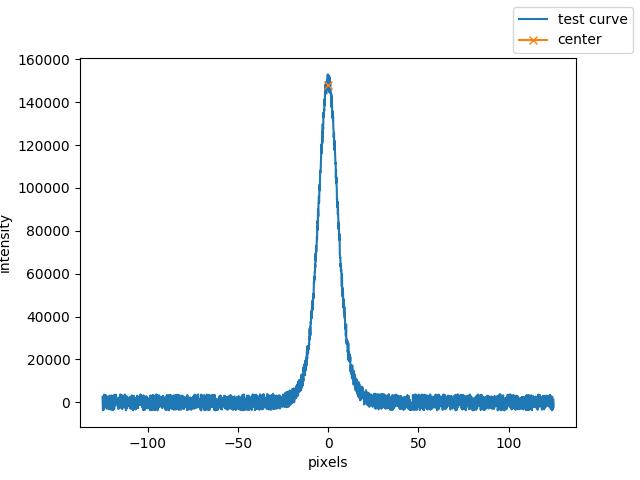

0.1999999999928832


In [4]:
%matplotlib notebook

from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

def moffat_d(r,a,b,i):
    return i*(1+(r/a)**2)**(-b)

slitlim=125
slitstep=0.1
rlist=np.arange(-slitlim,slitlim,slitstep)
atest=13.4
btest=3.43
I0test=1.5e5
noiset=0.05
exmoffat=moffat_d(rlist,atest,btest,I0test)+I0test*noiset*(np.random.rand(len(rlist))-.5)


rawint=slitstep*sum(exmoffat)
middle=slitstep*sum(exmoffat*rlist)/rawint

girth=int(1/slitstep)

midind=int((middle-rlist[0])/slitstep)
print('middle:',exmoffat[midind])
print('middle av:',np.mean(exmoffat[midind-girth:midind+girth]))
print('max:',max(exmoffat))
print('median:',exmoffat[int(len(exmoffat)/2)])

f1,ax1=plt.subplots()


ax1.set_xlabel("pixels")
ax1.set_ylabel("intensity")
ax1.plot(rlist, exmoffat, label="test curve")
ax1.plot(rlist[midind], exmoffat[midind], label="center", marker='x')
f1.legend()
plt.show()

print(rlist[midind])


<IPython.core.display.Javascript object>


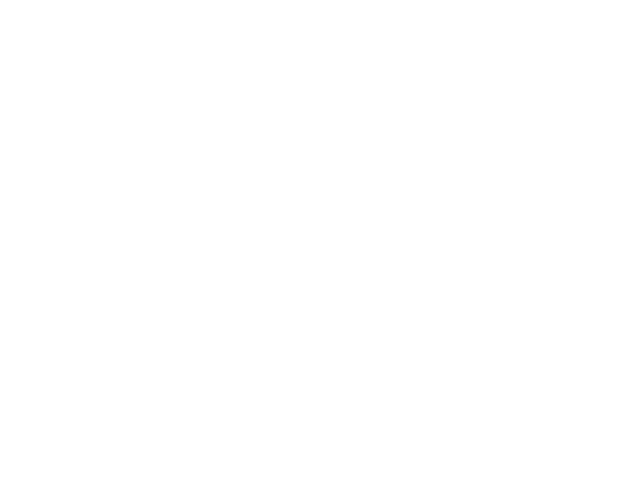

[1.33304227e+01 3.38159642e+00 1.49779643e+05]
13.4 3.43 150000.0


In [2]:
m0=[10,4,1e5]
mopt,mcov=curve_fit(moffat_d,rlist,exmoffat,p0=m0)
f2,ax2=plt.subplots()

ax2.set_xlabel("pixels")
ax2.set_ylabel("intensity")
ax2.plot(rlist, exmoffat, label="test curve")
ax2.plot(rlist, moffat_d(rlist,*mopt), label="fit")
f2.legend()
plt.show()
print(mopt)
print(atest,btest,I0test)

# Integrating with Composite Trapezoid Rule 

In [29]:
step=1
step2=step/2
npoints=int(2*slitlim/step)
T2=0.5*(moffat_d(slitlim,*mopt)+moffat_d(-slitlim,*mopt)) 
T1=T2
onecheck=False
for i in np.arange(-slitlim+step2,slitlim-step2,step2):
    T2+=moffat_d(i,*mopt)
    if onecheck:
        T1+=moffat_d(i,*mopt)
    onecheck=not onecheck
T1*=step
T2*=step*0.5
print("Trap sum full step: %.7f"%T1)
print("Trap sum half step: %.7f"%T2)
S=(4/3)*T2-T1/3
s=S/mopt[2]
print("Area under curve: %.7f"%S)
print("frac of I0 under curve: %.7f"%s)

Trap sum full step: 2413989.0663094
Trap sum half step: 2413832.3336021
Area under curve: 2413780.0893663
frac of I0 under curve: 16.0793688


In [7]:
step=0.005
step2=step/2
npoints=int(2*slitlim/step)
T2=0.5*(moffat_d(slitlim,*mopt)+moffat_d(-slitlim,*mopt)) 
T1=T2
onecheck=False
for i in np.arange(-slitlim+step2,slitlim-step2,step2):
    T2+=moffat_d(i,*mopt)
    if onecheck:
        T1+=moffat_d(i,*mopt)
    onecheck=not onecheck
T1*=step
T2*=step*0.5
print("Trap sum full step: %.7f"%T1)
print("Trap sum half step: %.7f"%T2)
S=(4/3)*T2-T1/3
s=S/mopt[2]
print("Area under curve: %.7f"%S)
print("frac of I0 under curve: %.7f"%s)

Trap sum full step: 2176719.6205012
Trap sum half step: 2176719.6204051
Area under curve: 2176719.6203731
frac of I0 under curve: 14.5328135


In [8]:
'''
ga=[]
gS=[]

for g in np.arange(0,40,1):
    ga.append(g)
    moopt=[g,1]
    step=0.0025
    step2=step/2
    npoints=int(2*slitlim/step)
    T2=0.5*(moffat_d(slitlim,*moopt)+moffat_d(-slitlim,*moopt)) 
    T1=T2
    onecheck=False
    for i in np.arange(-slitlim+step2,slitlim-step2,step2):
        T2+=moffat_d(i,*moopt)
        if onecheck:
            T1+=moffat_d(i,*moopt)
        onecheck=not onecheck
    T1*=step*I0
    T2*=step*0.5*I0
    #print("Trap sum full step: %.7f"%T1)
    #print("Trap sum half step: %.7f"%T2)
    S=(4/3)*T2-T1/3
    #s=S/I0
    #print("Area under curve: %.7f"%S)
    #print("frac of I0 under curve: %.7f"%s)
    gS.append(S)

fg,axg = plt.subplots()
axg.set_xlabel("value of beta")
axg.set_ylabel("area under curve")

axg.plot(ga, gS)
fg.show()
'''

'\nga=[]\ngS=[]\n\nfor g in np.arange(0,40,1):\n    ga.append(g)\n    moopt=[g,1]\n    step=0.0025\n    step2=step/2\n    npoints=int(2*slitlim/step)\n    T2=0.5*(moffat_d(slitlim,*moopt)+moffat_d(-slitlim,*moopt)) \n    T1=T2\n    onecheck=False\n    for i in np.arange(-slitlim+step2,slitlim-step2,step2):\n        T2+=moffat_d(i,*moopt)\n        if onecheck:\n            T1+=moffat_d(i,*moopt)\n        onecheck=not onecheck\n    T1*=step*I0\n    T2*=step*0.5*I0\n    #print("Trap sum full step: %.7f"%T1)\n    #print("Trap sum half step: %.7f"%T2)\n    S=(4/3)*T2-T1/3\n    #s=S/I0\n    #print("Area under curve: %.7f"%S)\n    #print("frac of I0 under curve: %.7f"%s)\n    gS.append(S)\n\nfg,axg = plt.subplots()\naxg.set_xlabel("value of beta")\naxg.set_ylabel("area under curve")\n\naxg.plot(ga, gS)\nfg.show()\n'

# Two Dimensions

# Radial Symmetry
We have an integration area unit of $r \,\mathrm{d} r \,\mathrm{d}\theta$, allowing us to analytically integrate.
$$P=\int_0^{2\pi} \int_0^r \left[1+\frac{r^2}{\alpha^2}\right]^{-\beta} r\,\mathrm{d} r\,\mathrm{d}\theta$$
$$P=\int_0^{2\pi}\frac{\alpha^2}{2(\beta-1)}\left(1-\left[1+\frac{r^2}{\alpha^2}\right]^{1-\beta}\right)\,\mathrm{d}\theta$$
And if we assume radial symmetry of the object, or $\frac{\mathrm{d}r}{\mathrm{d}\theta}=0$:
$$P=\frac{\alpha^2 \pi}{\beta-1}\left(1-\left[1+\frac{r^2}{\alpha^2}\right]^{1-\beta}\right)$$

<IPython.core.display.Javascript object>


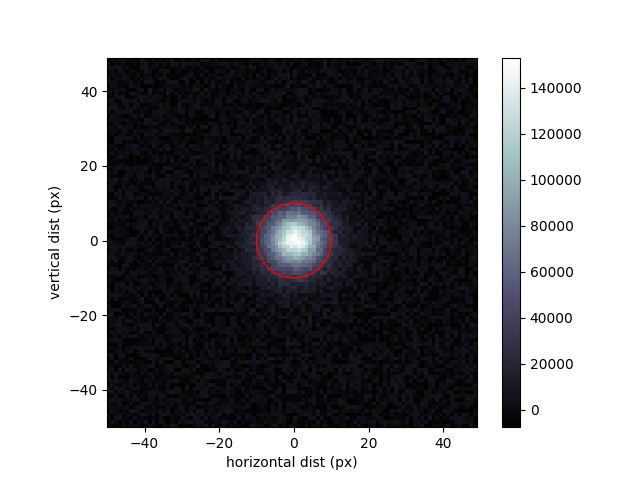

22946098.437628794


In [38]:
def moffat_xy(x,y,a,b,i):
    return i*(1+(x**2+y**2)/(a**2))**(-b)

def analytic_pr(r,a,b,i):
    return i*(a**2*np.pi/(b-1))*(1-(1+r**2/a**2)**(1-b))

slitlim=50
slitstep=1
atest=13.4
btest=3.43
I0test=1.5e5
noiset=0.1
radius=10

rx=radius*np.cos(np.linspace(0,2*np.pi,1000))
ry=radius*np.sin(np.linspace(0,2*np.pi,1000))

xlist=np.arange(-slitlim,slitlim,slitstep)
ylist=np.arange(-slitlim,slitlim,slitstep)
xx,yy=np.meshgrid(xlist,ylist)
ex3moffat=moffat_xy(xx,yy,atest,btest,I0test)+I0test*noiset*(np.random.rand(len(xlist),len(ylist))-.5)
ex3moffatclean=moffat_xy(xx,yy,atest,btest,I0test)

f3,ax3 = plt.subplots()
ax3.set_aspect('equal')
ax3.set_xlabel("horizontal dist (px)")
ax3.set_ylabel("vertical dist (px)")
cf3=ax3.pcolormesh(xlist,ylist,ex3moffat,cmap=plt.cm.bone)
f3.colorbar(cf3, ax=ax3)
ax3.plot(rx,ry,color="r", linewidth='1')
plt.show()
print(analytic_pr(radius,atest,btest,I0test))

Trying to find the center of the galaxy by using a weighted average of position and brightness:

34718126.73358307
-0.3857319537786331
0.030717327729072874


<IPython.core.display.Javascript object>


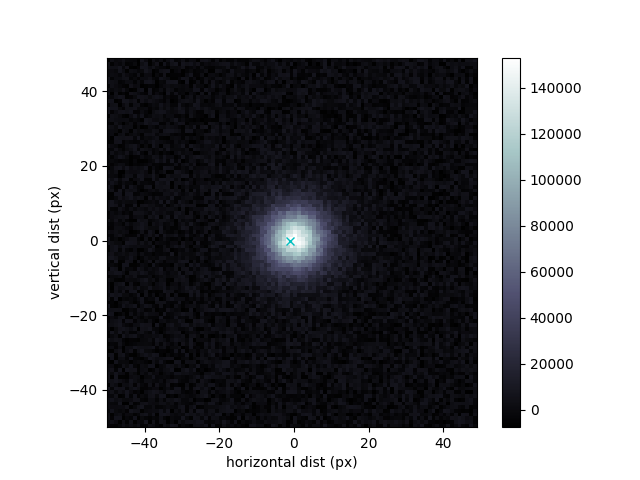

In [39]:
rawint=sum(sum(ex3moffat))*slitstep**2
xcen=slitstep**2*sum(sum(xx*ex3moffat))/rawint
ycen=slitstep**2*sum(sum(yy*ex3moffat))/rawint
print(rawint)
print(xcen)
print(ycen)
xind=int((xcen-xlist[0])/slitstep)
yind=int((ycen-ylist[0])/slitstep)

f3,ax3 = plt.subplots()
ax3.set_aspect('equal')
cf3=ax3.pcolormesh(xlist,ylist,ex3moffat,cmap=plt.cm.bone)
ax3.set_xlabel("horizontal dist (px)")
ax3.set_ylabel("vertical dist (px)")
f3.colorbar(cf3, ax=ax3)
ax3.plot(xlist[xind],ylist[yind],color="c", marker='x')
plt.show()

In [ ]:
f4,ax4 = plt.subplots()

ax4.plot(xlist,ex3moffat[:,yind],color="b", linewidth=1)
ax4.plot(ylist,ex3moffat[xind,:],color="r", linewidth=1)
plt.show()

<IPython.core.display.Javascript object>


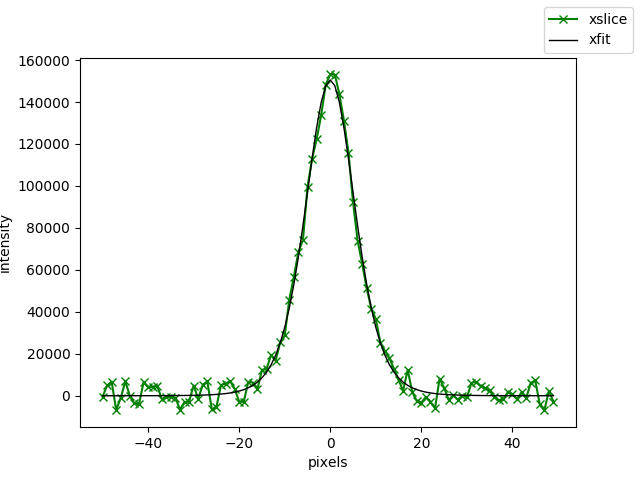

[1.47074698e+01 4.02557477e+00 1.50522005e+05]
13.4 3.43 150000.0


<IPython.core.display.Javascript object>


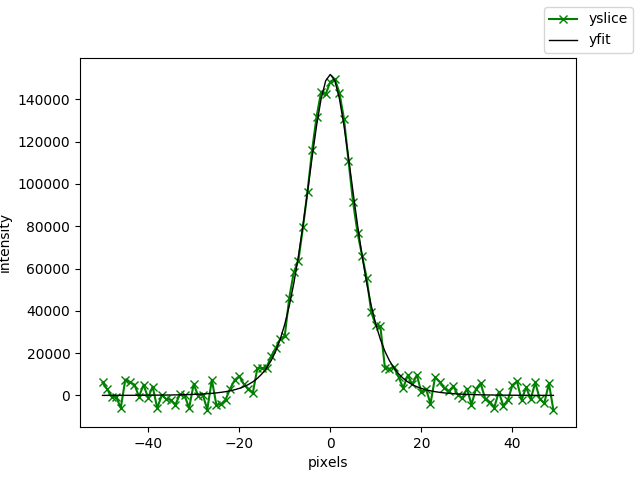

[1.21304881e+01 2.90771134e+00 1.51747487e+05]
13.4 3.43 150000.0


In [40]:
m0=[10,1,1e5]
mopt,mcov=curve_fit(moffat_d,xlist,ex3moffat[:][yind],p0=m0)
f2,ax2=plt.subplots()

ax2.set_xlabel("pixels")
ax2.set_ylabel("intensity")
ax2.plot(xlist,ex3moffat[:,yind],color="g", marker='x',label="xslice")
ax2.plot(xlist,moffat_d(xlist,*mopt),color="k", linewidth=1,label="xfit")
f2.legend()
plt.show()
print(mopt)
print(atest,btest,I0test)

m0=[10,1,1e5]
mopt,mcov=curve_fit(moffat_d,ylist,ex3moffat[xind][:],p0=m0)
f2,ax2=plt.subplots()

ax2.set_xlabel("pixels")
ax2.set_ylabel("intensity")
ax2.plot(ylist,ex3moffat[xind,:],color="g", marker='x',label="yslice")
ax2.plot(ylist,moffat_d(ylist,*mopt),color="k", linewidth=1,label="yfit")
f2.legend()
plt.show()
print(mopt)
print(atest,btest,I0test)

And we get $\alpha,\beta, I_0$ parameters to plug into our analytic equation for some radius $r$.

<IPython.core.display.Javascript object>


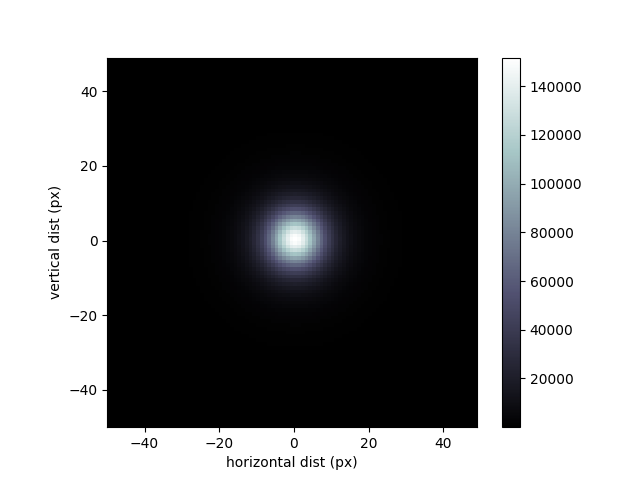

In [41]:
fa,axa=plt.subplots()

ex3moffatR=moffat_xy(xx,yy,*mopt)
cfa=axa.pcolormesh(xlist,ylist,ex3moffatR,cmap=plt.cm.bone)
fa.colorbar(cfa, ax=axa)
axa.set_aspect('equal')
axa.set_xlabel("horizontal dist (px)")
axa.set_ylabel("vertical dist (px)")
plt.show()

In [ ]:
fb,axb=plt.subplots()
plt.title("Offset from ideal")
cfb=axb.pcolormesh(xlist,ylist,ex3moffatR-ex3moffatclean,cmap=plt.cm.bone)
fb.colorbar(cfb, ax=axb)
axb.set_aspect('equal')
axb.set_xlabel("horizontal dist (px)")
axb.set_ylabel("vertical dist (px)")
plt.show()

# Riemann Integration over a slit

<IPython.core.display.Javascript object>


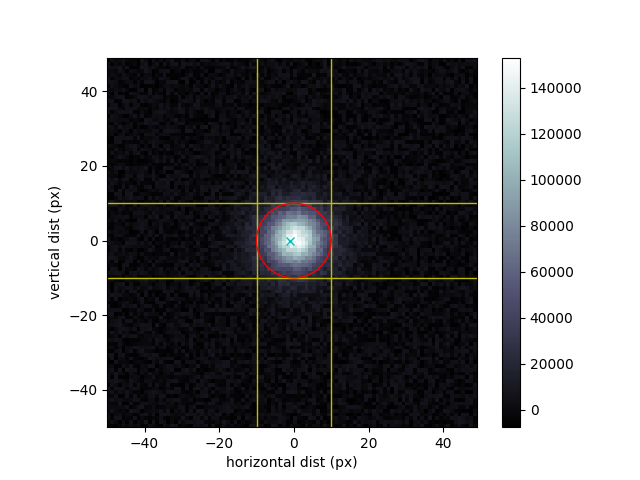

riemann sum of slit:  26252420.36653988
riemann sum of circle:  23185556.153219476
analytic int of ideal:  22946098.437628794
analytic int of model:  23097845.853744086


In [46]:
xmax=10
xmin=-10
ymax=10
ymin=-10

xmaxi=int((xmax-xlist[0])/slitstep)+1
xmini=int((xmin-xlist[0])/slitstep)
ymaxi=int((ymax-ylist[0])/slitstep)+1
ymini=int((ymin-ylist[0])/slitstep)

f3,ax3 = plt.subplots()
ax3.set_aspect('equal')
cf3=ax3.pcolormesh(xlist,ylist,ex3moffat,cmap=plt.cm.bone)
ax3.set_xlabel("horizontal dist (px)")
ax3.set_ylabel("vertical dist (px)")
f3.colorbar(cf3, ax=ax3)
ax3.plot(xlist,np.full(len(xlist),ymin),color='y',linewidth=1)
ax3.plot(xlist,np.full(len(xlist),ymax),color='y',linewidth=1)
ax3.plot(np.full(len(ylist),xmin),ylist,color='y',linewidth=1)
ax3.plot(np.full(len(ylist),xmax),ylist,color='y',linewidth=1)

ax3.plot(rx,ry,color="r", linewidth='1')
ax3.plot(xlist[xind],ylist[yind],color="c", marker='x')
plt.show()

modint=sum(sum(ex3moffatR[xmini:xmaxi,ymini:ymaxi]))*slitstep**2
cint=0
for xi in range(len(xlist)):
    for yi in range(len(ylist)):
        if (xlist[xi])**2+(ylist[yi])**2<=(radius)**2:
            cint=cint+ex3moffatR[xi,yi]*slitstep**2

print("riemann sum of slit: ",modint)
print("riemann sum of circle: ",cint)
print("analytic int of ideal: ",analytic_pr(radius,atest,btest,I0test))
print("analytic int of model: ",analytic_pr(radius,*mopt))

10171951.327101665
0.008374003951927878
-0.00827066960094769


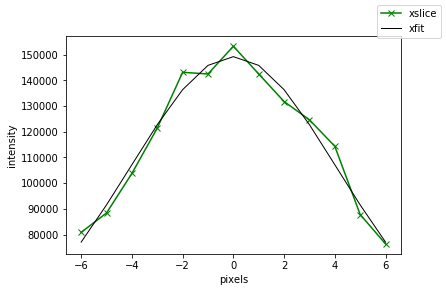

[7.92312736e+00 1.45738546e+00 1.49166835e+05]


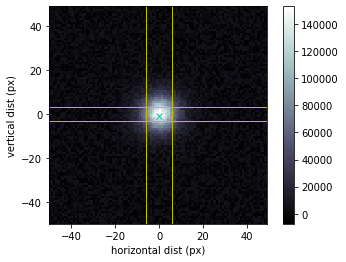

riemann sum of slit model:  9812590.936844498
riemann sum of slit raw:  10171951.327101665


In [52]:
%matplotlib inline

xmax=6
xmin=-6
ymax=3
ymin=-3

xmaxi=int((xmax-xlist[0])/slitstep)+1
xmini=int((xmin-xlist[0])/slitstep)
ymaxi=int((ymax-ylist[0])/slitstep)+1
ymini=int((ymin-ylist[0])/slitstep)

rawint=sum(sum(ex3moffat[xmini:xmaxi,ymini:ymaxi]))*slitstep**2
xcen=slitstep**2*sum(sum(xx[xmini:xmaxi,ymini:ymaxi]*ex3moffat[xmini:xmaxi,ymini:ymaxi]))/rawint
ycen=slitstep**2*sum(sum(yy[xmini:xmaxi,ymini:ymaxi]*ex3moffat[xmini:xmaxi,ymini:ymaxi]))/rawint
print(rawint)
print(xcen)
print(ycen)
xind=int((xcen-xlist[0])/slitstep)
yind=int((ycen-ylist[0])/slitstep)


m0=[10,1,1e5]
mopt,mcov=curve_fit(moffat_d,xlist[xmini:xmaxi],ex3moffat[xmini:xmaxi,yind],p0=m0)
f2,ax2=plt.subplots()
ax2.set_xlabel("pixels")
ax2.set_ylabel("intensity")
ax2.plot(xlist[xmini:xmaxi],ex3moffat[xmini:xmaxi,yind],color="g", marker='x',label="xslice")
ax2.plot(xlist[xmini:xmaxi],moffat_d(xlist[xmini:xmaxi],*mopt),color="k", linewidth=1,label="xfit")
f2.legend()
plt.show()
print(mopt)
ex3moffatR=moffat_xy(xx,yy,*mopt)

f3,ax3 = plt.subplots()
ax3.set_aspect('equal')
cf3=ax3.pcolormesh(xlist,ylist,ex3moffat,cmap=plt.cm.bone)
ax3.set_xlabel("horizontal dist (px)")
ax3.set_ylabel("vertical dist (px)")
ax3.plot(xlist[xind],ylist[yind],color="c", marker='x')
f3.colorbar(cf3, ax=ax3)
ax3.plot(xlist,np.full(len(xlist),ymin),color='y',linewidth=1)
ax3.plot(xlist,np.full(len(xlist),ymax),color='y',linewidth=1)
ax3.plot(np.full(len(ylist),xmin),ylist,color='y',linewidth=1)
ax3.plot(np.full(len(ylist),xmax),ylist,color='y',linewidth=1)
plt.show()

modint=sum(sum(ex3moffatR[xmini:xmaxi,ymini:ymaxi]))*slitstep**2
print("riemann sum of slit model: ",modint)
modintr=sum(sum(ex3moffat[xmini:xmaxi,ymini:ymaxi]))*slitstep**2
print("riemann sum of slit raw: ",modintr)

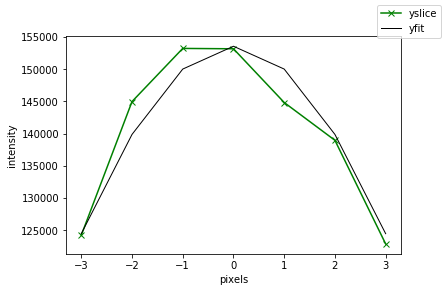

[   239.33449295   1337.04255988 153548.80742172]


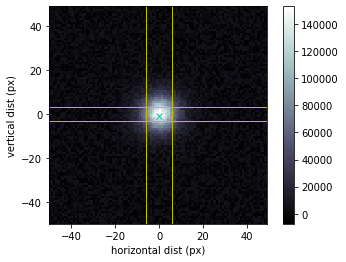

riemann sum of slit model:  9579311.141010478
riemann sum of slit raw:  10171951.327101665


In [53]:
m0=[10,1,1e5]
f2,ax2=plt.subplots()
ax2.set_xlabel("pixels")
ax2.set_ylabel("intensity")
mopt,mcov=curve_fit(moffat_d,ylist[ymini:ymaxi],ex3moffat[xind,ymini:ymaxi],p0=m0)
ax2.plot(ylist[ymini:ymaxi],ex3moffat[xind,ymini:ymaxi],color="g", marker='x',label="yslice")
ax2.plot(ylist[ymini:ymaxi],moffat_d(ylist[ymini:ymaxi],*mopt),color="k", linewidth=1,label="yfit")
f2.legend()
plt.show()

print(mopt)
ex3moffatR=moffat_xy(xx,yy,*mopt)

f3,ax3 = plt.subplots()
ax3.set_aspect('equal')
cf3=ax3.pcolormesh(xlist,ylist,ex3moffat,cmap=plt.cm.bone)
ax3.set_xlabel("horizontal dist (px)")
ax3.set_ylabel("vertical dist (px)")
ax3.plot(xlist[xind],ylist[yind],color="c", marker='x')
f3.colorbar(cf3, ax=ax3)
ax3.plot(xlist,np.full(len(xlist),ymin),color='y',linewidth=1)
ax3.plot(xlist,np.full(len(xlist),ymax),color='y',linewidth=1)
ax3.plot(np.full(len(ylist),xmin),ylist,color='y',linewidth=1)
ax3.plot(np.full(len(ylist),xmax),ylist,color='y',linewidth=1)
plt.show()

modint=sum(sum(ex3moffatR[xmini:xmaxi,ymini:ymaxi]))*slitstep**2
print("riemann sum of slit model: ",modint)
modintr=sum(sum(ex3moffat[xmini:xmaxi,ymini:ymaxi]))*slitstep**2
print("riemann sum of slit raw: ",modintr)

In [ ]:
def slices(xind,yind,n,xmini,xmaxi,ymini,ymaxi):
    ang=np.pi/n
    slope=0
    tx=np.linspace(-1,1,2*(xmaxi-xmini))
    tx=np.linspace(-1,1,2*(ymaxi-ymini))
    slices=np.zeros((n,ymaxi-ymini,xmaxi-xmini))
    for i in range(n):
        for x in np.arange(xmini,xmaxi,1):
            for y in np.arange(ymini,ymaxi,1):
                if (y-yind)/(x-xind)